# Bài tập thực hành 6: Giảm chiều và phân cụm dữ liệu

Sinh viên thực hiện: Nguyễn Ngọc Thức

MSSV: 21521506


## Phần 1: Principal Component Analysis (PCA) 

**Mục tiêu:** Hiểu và áp dụng PCA để giảm chiều dữ liệu và phân tích thành phần chính. 

**Dữ liệu:** Sử dụng bộ dữ liệu Delay Prediction hoặc bất kỳ bộ dữ liệu nhiều chiều nào. 

**Bài tập cơ bản:**



### 1. Tiền xử lý dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv')
data

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,PACK QTY,WEIGHT PER PIECE,SUPPLIER_DIV,SPECIAL_DIV,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME
0,2022-08-25,MJP,08344472000137,21031103,344472,OSA1,F7171260007,8121,8,1,...,0,1020,2.0,0,25,4,453.0,NaN,NaN,135557
1,2022-08-12,MJP,06000641365551,3712333,641,MSM1,30071630003,0263,1,1,...,0,120,1.0,0,12,5,451.0,NaN,NaN,134532
2,2022-07-08,MJP,07032167936864,21045918,32167,SMC1,F7499483132,9102,1,1,...,0,18000,3.0,0,8,5,410.0,NaN,NaN,160936
3,2022-07-08,MJP,01710046000973,21058302,710046,MIB1,F4524160001,9163,1,1,...,0,500,2.0,0,8,5,453.0,NaN,NaN,160702
4,2022-08-25,MJP,07107539916817,21050569,107539,NIQ1,F3017310155,9176,6,1,...,0,36,2.0,0,25,4,455.0,NaN,NaN,160244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,2022-07-27,MJP,KAW06CCI000005,21020310,147666,UNT1,F3016410297,8107,1,1,...,0,100,3.0,1,27,3,NaN,NaN,NaN,84245
26213,2022-07-27,MJP,GC00HIAI002754,23027680,251577,TRC1,K8014170003,8484,2,1,...,10,315,3.0,1,27,3,401.0,NaN,NaN,190113
26214,2022-07-27,MJP,GA00MTLM000244,3721101,251577,MSM1,30016660009,3764,1,1,...,0,28,1.0,1,27,3,NaN,NaN,NaN,195137
26215,2022-08-19,MJP,CAW02AW3000626,6050902,254252,MSM1,62700021018,1029,6,0,...,0,40,2.0,1,19,5,401.0,NaN,NaN,160258


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order date                       26217 non-null  object 
 1   SUBSIDIARY_CD                    26217 non-null  object 
 2   GLOBAL_NO                        26217 non-null  object 
 3   CLASSIFY_CD                      26217 non-null  int64  
 4   CUST_CD                          26217 non-null  int64  
 5   BRAND_CD                         26217 non-null  object 
 6   INNER_CD                         26217 non-null  object 
 7   SUPPLIER_CD                      26217 non-null  object 
 8   Sales order line number          26217 non-null  int64  
 9   Stock class                      26217 non-null  int64  
 10  Consider count hodiday Saturday  26217 non-null  int64  
 11  SO QTY                           26217 non-null  int64  
 12  OTHER AREA SHIP DI

In [4]:
data.isna().sum()

Order date                             0
SUBSIDIARY_CD                          0
GLOBAL_NO                              0
CLASSIFY_CD                            0
CUST_CD                                0
BRAND_CD                               0
INNER_CD                               0
SUPPLIER_CD                            0
Sales order line number                0
Stock class                            0
Consider count hodiday Saturday        0
SO QTY                                 0
OTHER AREA SHIP DIV                20219
ALLOCATION QTY                         0
SUPPLIER INV AMOUNT                    0
PACKING RANK                           0
PRODUCT_CD                             0
PRODUCT ATTRIBUTION                    0
SPECIAL DIV                            0
LOGICAL PLANT                          0
PURCHASE AMOUNT                        0
VSD                                    0
DIRECT SHIP FLG                        0
DELI_DIV                               0
label           

Sau khi nhìn sơ qua dữ liệu, ta thấy có nhiều cột dữ liệu không phải dạng số, có những cột dữ liệu bị thiếu. Cách xử lý: 

- Đối với những cột dữ liệu không phải số, những cột bị thiếu > 70% mẫu: thực hiện xóa khỏi bộ dữ liệu. 

- Đối với những cột dữ liệu bị thiếu < 70% mẫu: điền những mẫu bị thiếu bằng giá trị trung bình trong cột. 

Cuối cùng thực hiện chuẩn hóa bằng Standard Scaler. 

In [5]:
data = data.drop(columns=data.columns[data.dtypes == 'object']) # drop columns with object data type
data = data.drop(columns=data.columns[data.isna().sum() > 0.7*data.shape[0]]) # drop columns with more than 70% missing values

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data) # impute missing values with mean

In [7]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
data = scaler.fit_transform(data) # scale data

### 2. Xây dựng và Áp dụng PCA

Tạo hàm myPCA và áp dụng lên bộ dữ liệu.  

In [8]:
def myPCA(A, n_components=None):  
    cov_matrix = np.cov(A.T)  
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) 

    # Sắp xếp các vector riêng theo thứ tự giảm dần của giá trị riêng
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    # Chọn các vector riêng tương ứng với n_components giá trị riêng lớn nhất
    if n_components is not None:
        eigenvectors = eigenvectors[:, :n_components]
    
    # Chuyển đổi dữ liệu sang không gian thành phần chính
    pca_data = np.dot(A, eigenvectors)
    
    # Tính tỷ lệ phương sai giải thích
    explained_variance = eigenvalues / np.sum(eigenvalues)
    
    if n_components is not None:
        explained_variance = explained_variance[:n_components]
    
    return pca_data, explained_variance 

Áp dụng PCA cho tập dữ liệu Delay Prediction rồi sau đó áp dụng thuật 
toán K-means trên thành phần chính thứ nhất. 

Liệu phân bổ cụm có phù 
hợp khi sử dụng K-means trên tập dữ liệu gốc không? 

Điều gì xảy ra khi 
bạn sử dụng thành phần chính thứ hai để thực hiện phân cụm?

In [9]:
# Áp dụng PCA cho dữ liệu
data_pca, explained_variance = myPCA(data)

In [10]:
from sklearn.cluster import KMeans

# K-means clustering trên thành phần chính thứ nhất
kmeans_pca1 = KMeans(n_clusters=3, random_state=0).fit(data_pca[:, :1])
clusters_pca1 = kmeans_pca1.labels_

In [11]:
from sklearn.cluster import KMeans

# K-means clustering trên thành phần chính thứ hai
kmeans_pca2 = KMeans(n_clusters=3, random_state=0).fit(data_pca[:, 1:2])
clusters_pca2 = kmeans_pca2.labels_

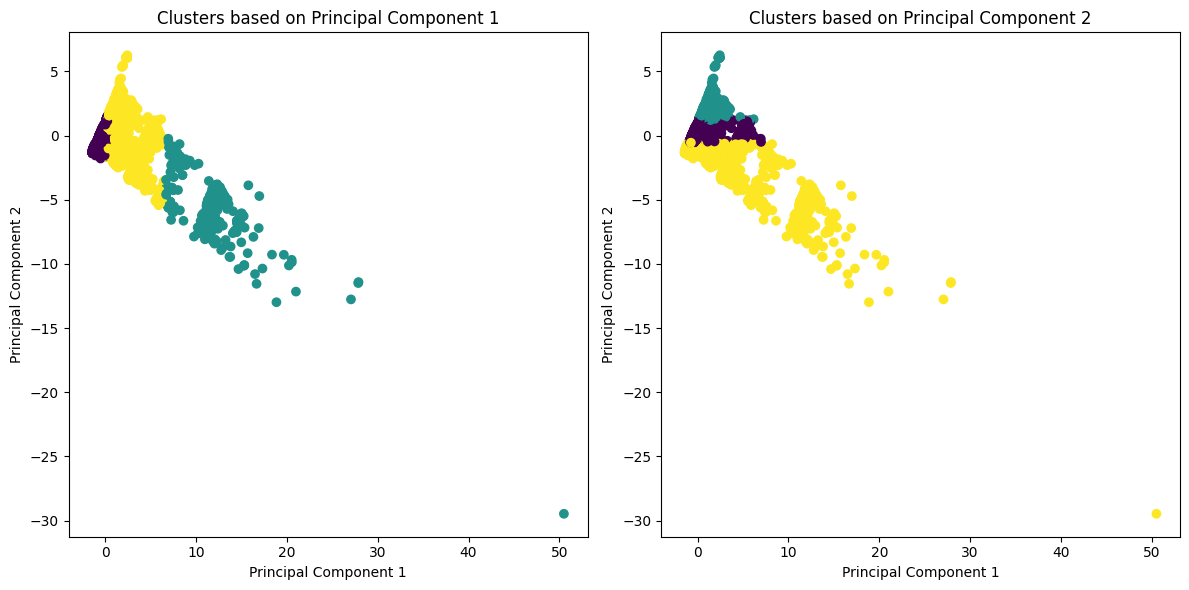

In [12]:
# Vẽ dữ liệu trong không gian 2 chiều của hai thành phần chính đầu tiên
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_pca1, cmap='viridis')
plt.title('Clusters based on Principal Component 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_pca2, cmap='viridis')
plt.title('Clusters based on Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

- Phân bổ cụm không phù hợp khi sử dụng K-means trên dữ liệu gốc bởi vì trên dữ liệu gốc nhiều cột có dữ liệu rời rạc, hơn nữa vẫn chưa được chuẩn hóa, điều này dễ dẫn đến việc những cột có giá trị lớn sẽ ảnh hưởng mạnh tới việc phân cụm, lấn át những cột có giá trị nhỏ hơn. 
- Nhận thấy khi sử dụng K-means trên PC1, 3 cluster được sinh ra sẽ phân bố theo chiều của PC1 một cách tuyến tính. Ngược lại, khi áp dụng K-means trên PC2 thì các cluster sẽ phân bố theo chiều của PC2. Tuy nhiên, phân cụm trên PC1 tỏ ra hiệu quả hơn, 3 cluster thể hiện tách bạch rõ ràng hơn, điều này là do tỷ lệ giải thích của PC1 cao hơn PC2. 

Vẽ các điểm dữ liệu trong không gian 2 chiều thu được từ hai thành phần 
chính đầu tiên. 

C:\Users\Kaisaac\AppData\Local\Temp\ipykernel_13288\1609035844.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis')


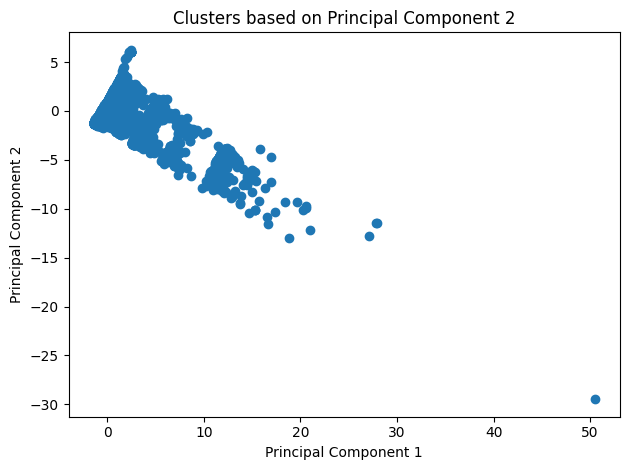

In [13]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis')
plt.title('Clusters based on Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

Chọn số lượng thành phần chính và giải thích lựa chọn. 

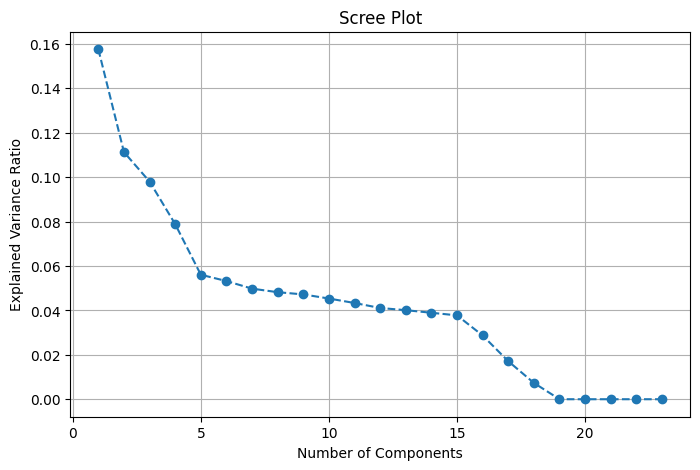

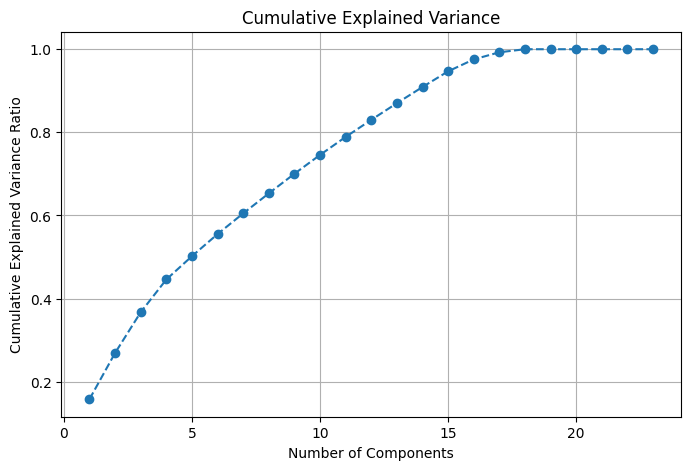

In [14]:
# Tính tỷ lệ phương sai tích lũy
cumulative_variance_ratio = np.cumsum(explained_variance)

# Vẽ biểu đồ Scree
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Vẽ tỷ lệ phương sai tích lũy
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()


Biểu đồ Scree Plot có 2 điểm gãy là 5 và 19, chưa thể chọn được n_component tối ưu. Tuy nhiên, khi quan sát biểu đồ Tỷ lệ phương sai tích lũy, với điểm 5 thì chỉ mới giải thích được khoảng 50% dữ liệu, nhưng với điểm 19 thể hiện được 100% dữ liệu. Do đó n_component tối ưu sẽ chọn là 19. 

**Câu hỏi yêu cầu:** 
- Giải thích tại sao PCA là một phương pháp hữu ích trong giảm chiều dữ liệu. 

    - Giảm chiều mà vẫn giữ được thông tin quan trọng: PCA chuyển đổi dữ liệu ban đầu có chiều cao thành một tập hợp các biến mới (gọi là các thành phần chính) ít chiều hơn nhưng vẫn giữ được phần lớn thông tin quan trọng của dữ liệu. Các thành phần chính này được sắp xếp theo thứ tự từ nhiều thông tin nhất đến ít thông tin nhất. Do đó, việc giữ lại một số thành phần đầu tiên giúp giảm chiều dữ liệu mà không làm mất mát quá nhiều thông tin.

    - Loại bỏ sự dư thừa và tương quan: Trong nhiều tập dữ liệu, các biến có thể tương quan cao với nhau, nghĩa là chúng chứa đựng thông tin tương tự nhau. PCA xác định và loại bỏ các chiều dữ liệu dư thừa này bằng cách biến đổi chúng thành các thành phần chính, giúp đơn giản hóa dữ liệu và giảm thiểu sự phức tạp.

    - Tăng tốc độ xử lý và giảm chi phí lưu trữ: Dữ liệu ít chiều hơn yêu cầu ít tài nguyên hơn cho việc xử lý và lưu trữ. Các thuật toán học máy và thống kê thường hoạt động nhanh hơn và hiệu quả hơn với dữ liệu ít chiều, giúp tiết kiệm thời gian và chi phí.

    - Cải thiện trực quan hóa: Dữ liệu nhiều chiều rất khó để trực quan hóa. PCA giúp giảm chiều dữ liệu xuống 2 hoặc 3 chiều, giúp chúng ta dễ dàng trực quan hóa và hiểu rõ hơn về cấu trúc của dữ liệu.

    - Giảm thiểu nhiễu: PCA có thể giúp giảm nhiễu bằng cách giữ lại các thành phần chính có ý nghĩa nhất và loại bỏ các thành phần chứa ít thông tin hoặc chỉ chứa nhiễu.
    
- Làm thế nào để quyết định số lượng thành phần chính cần sử dụng? 

    Để quyết định số lượng thành phần chính (principal components) cần sử dụng trong PCA, bạn có thể sử dụng các phương pháp sau đây:

    - **Biểu đồ Scree (Scree Plot):** 

        Biểu đồ Scree là đồ thị vẽ giá trị riêng (eigenvalues) của các thành phần chính theo thứ tự giảm dần. 
        
        Số lượng thành phần chính được chọn là điểm gãy (elbow point) trên biểu đồ, nơi mà sự giảm sút của giá trị riêng trở nên ít dốc hơn. Sau điểm gãy này, các thành phần chính thêm vào chỉ đóng góp rất ít vào tổng phương sai của dữ liệu.

    - **Tỷ lệ phương sai tích lũy (Cumulative Explained Variance Ratio):** 
        
        Tính tổng tỷ lệ phương sai giải thích bởi các thành phần chính. 
        
        Chọn số lượng thành phần chính sao cho tổng tỷ lệ phương sai tích lũy đạt đến một ngưỡng nhất định, thường là 90% hoặc 95%. Điều này đảm bảo rằng bạn giữ lại phần lớn thông tin của dữ liệu.

- So sánh PCA với ít nhất một kỹ thuật giảm chiều dữ liệu khác.

    PCA và t-SNE là hai kỹ thuật giảm chiều dữ liệu phổ biến với những ưu và nhược điểm riêng. Dưới đây là bảng so sánh hai kỹ thuật này:

    | Đặc điểm              | PCA | t-SNE |
    | :---------------- | :------: | :----: |
    | Mục tiêu        |   Tìm các hướng chính trong dữ liệu để giảm chiều   | Bảo toàn cấu trúc cục bộ của dữ liệu |
    | Giả định           |   Dữ liệu có mối quan hệ tuyến tính   | Dữ liệu không nhất thiết phải có mối quan hệ tuyến tính |
    | Hiệu quả    |  Hiệu quả   | Tốn kém hơn PCA |
    | Giải thích |  Các thành phần chính có thể được giải thích theo nghĩa thực tế   | Kết quả khó giải thích hơn |
    |Ưu điểm	|Giữ lại nhiều thông tin, hiệu quả tính toán cao, dễ dàng triển khai	|Bảo toàn cấu trúc cục bộ tốt, phù hợp với dữ liệu phi tuyến tính|
    |Nhược điểm	|Mất thông tin, giả định tuyến tính, nhạy cảm với tỷ lệ	|Tốn kém về mặt tính toán, kết quả khó giải thích|


    Sử dụng PCA trong trường hợp:

    - Cần giảm chiều dữ liệu một cách hiệu quả.

    - Dữ liệu có mối quan hệ tuyến tính.

    - Cần có thể giải thích kết quả.

    Sử dụng t-SNE trong trường hợp:

    - Cần bảo toàn cấu trúc cục bộ của dữ liệu.

    - Dữ liệu không nhất thiết phải có mối quan hệ tuyến tính.

    - Sẵn sàng đánh đổi hiệu suất tính toán để có được kết quả tốt hơn.

## Phần 2: Phân cụm dữ liệu (Clustering)

**Mục tiêu:** Hiểu và sử dụng thuật toán K-means clustering để phân cụm dữ liệu. 

**Dữ liệu:** Sử dụng bộ dữ liệu Delay Prediction hoặc bất kỳ bộ dữ liệu nhiều chiều nào. 

**Bài tập cơ bản:**



### 1. Tiền xử lý dữ liệu

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('data\delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv')
data

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,PACK QTY,WEIGHT PER PIECE,SUPPLIER_DIV,SPECIAL_DIV,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME
0,2022-08-25,MJP,08344472000137,21031103,344472,OSA1,F7171260007,8121,8,1,...,0,1020,2.0,0,25,4,453.0,NaN,NaN,135557
1,2022-08-12,MJP,06000641365551,3712333,641,MSM1,30071630003,0263,1,1,...,0,120,1.0,0,12,5,451.0,NaN,NaN,134532
2,2022-07-08,MJP,07032167936864,21045918,32167,SMC1,F7499483132,9102,1,1,...,0,18000,3.0,0,8,5,410.0,NaN,NaN,160936
3,2022-07-08,MJP,01710046000973,21058302,710046,MIB1,F4524160001,9163,1,1,...,0,500,2.0,0,8,5,453.0,NaN,NaN,160702
4,2022-08-25,MJP,07107539916817,21050569,107539,NIQ1,F3017310155,9176,6,1,...,0,36,2.0,0,25,4,455.0,NaN,NaN,160244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,2022-07-27,MJP,KAW06CCI000005,21020310,147666,UNT1,F3016410297,8107,1,1,...,0,100,3.0,1,27,3,NaN,NaN,NaN,84245
26213,2022-07-27,MJP,GC00HIAI002754,23027680,251577,TRC1,K8014170003,8484,2,1,...,10,315,3.0,1,27,3,401.0,NaN,NaN,190113
26214,2022-07-27,MJP,GA00MTLM000244,3721101,251577,MSM1,30016660009,3764,1,1,...,0,28,1.0,1,27,3,NaN,NaN,NaN,195137
26215,2022-08-19,MJP,CAW02AW3000626,6050902,254252,MSM1,62700021018,1029,6,0,...,0,40,2.0,1,19,5,401.0,NaN,NaN,160258


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order date                       26217 non-null  object 
 1   SUBSIDIARY_CD                    26217 non-null  object 
 2   GLOBAL_NO                        26217 non-null  object 
 3   CLASSIFY_CD                      26217 non-null  int64  
 4   CUST_CD                          26217 non-null  int64  
 5   BRAND_CD                         26217 non-null  object 
 6   INNER_CD                         26217 non-null  object 
 7   SUPPLIER_CD                      26217 non-null  object 
 8   Sales order line number          26217 non-null  int64  
 9   Stock class                      26217 non-null  int64  
 10  Consider count hodiday Saturday  26217 non-null  int64  
 11  SO QTY                           26217 non-null  int64  
 12  OTHER AREA SHIP DI

In [18]:
data.isna().sum()

Order date                             0
SUBSIDIARY_CD                          0
GLOBAL_NO                              0
CLASSIFY_CD                            0
CUST_CD                                0
BRAND_CD                               0
INNER_CD                               0
SUPPLIER_CD                            0
Sales order line number                0
Stock class                            0
Consider count hodiday Saturday        0
SO QTY                                 0
OTHER AREA SHIP DIV                20219
ALLOCATION QTY                         0
SUPPLIER INV AMOUNT                    0
PACKING RANK                           0
PRODUCT_CD                             0
PRODUCT ATTRIBUTION                    0
SPECIAL DIV                            0
LOGICAL PLANT                          0
PURCHASE AMOUNT                        0
VSD                                    0
DIRECT SHIP FLG                        0
DELI_DIV                               0
label           

Sau khi nhìn sơ qua dữ liệu, ta thấy có nhiều cột dữ liệu không phải dạng số, có những cột dữ liệu bị thiếu. Cách xử lý: 

- Đối với những cột dữ liệu không phải số, những cột bị thiếu > 70% mẫu: thực hiện xóa khỏi bộ dữ liệu. 

- Đối với những cột dữ liệu bị thiếu < 70% mẫu: điền những mẫu bị thiếu bằng giá trị trung bình trong cột. 

Cuối cùng thực hiện chuẩn hóa bằng Standard Scaler. 

In [19]:
data = data.drop(columns=data.columns[data.dtypes == 'object']) # drop columns with object data type
data = data.drop(columns=data.columns[data.isna().sum() > 0.7*data.shape[0]]) # drop columns with more than 70% missing values

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data) # impute missing values with mean

In [21]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
data = scaler.fit_transform(data) # scale data

In [22]:
data = data_pca

### 2. Áp dụng K-Mean Clustering 

**Để dễ dàng Visualize, chỉ thực hiện K-mean trên 2 chiều đầu tiên trên bộ dữ liệu đã được giảm chiều bằng PCA**

Tạo một hàm myKmeans sẽ nhận một tập dữ liệu A và các trung tâm cụm 
ngẫu nhiên ban đầu, và áp dụng thuật toán K-means (có thể tạo một hàm 
vẽ biểu đồ có thể được gọi trong mỗi lần lặp để vẽ sự phân bổ cụm).

In [23]:
def plot_clusters(A, clusters, centroids, iteration):
    plt.figure()
    for k in range(len(centroids)):
        cluster_points = A[clusters == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.show()

def myKmeans(A, num_clusters, max_iters=100):
    np.random.seed(0)  # For reproducibility
    initial_centroids_idx = np.random.choice(A.shape[0], num_clusters, replace=False)
    centroids = A[initial_centroids_idx]

    for iteration in range(max_iters):
        # Assign clusters
        distances = np.sqrt(((A - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([A[clusters == k].mean(axis=0) for k in range(num_clusters)])

        # Plot clusters
        plot_clusters(A, clusters, new_centroids, iteration)
        plt.close()

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

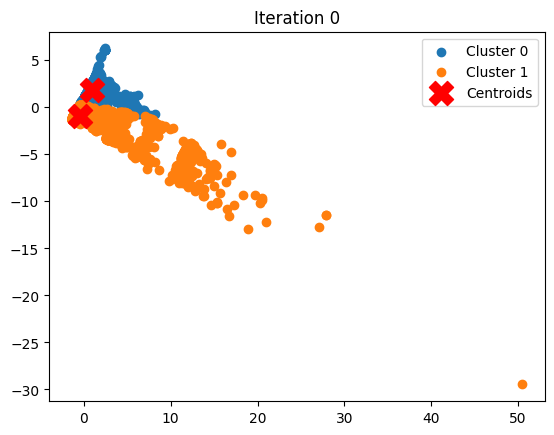

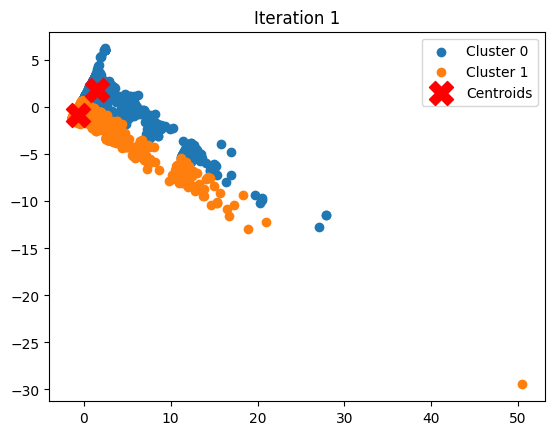

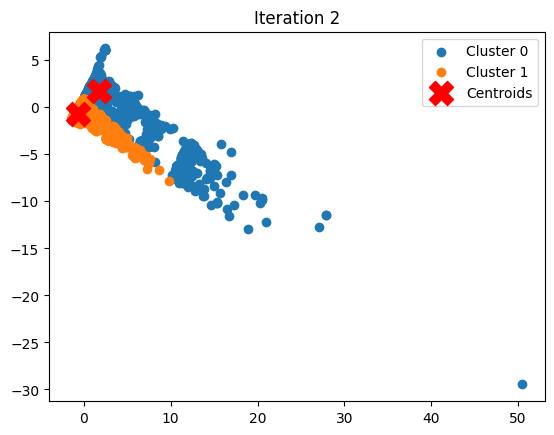

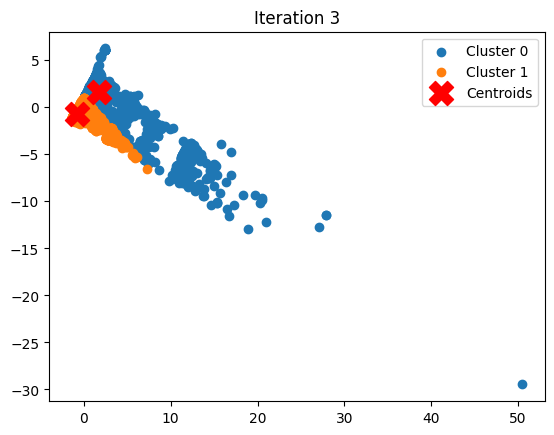

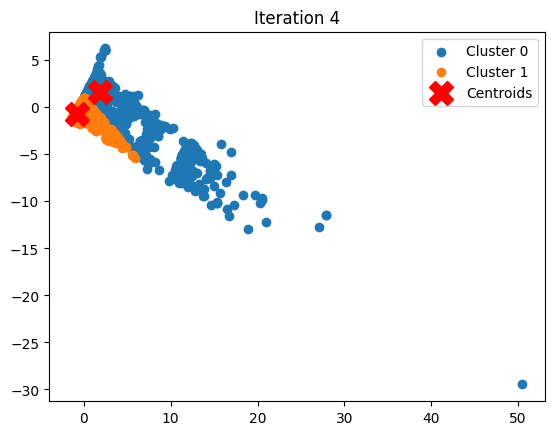

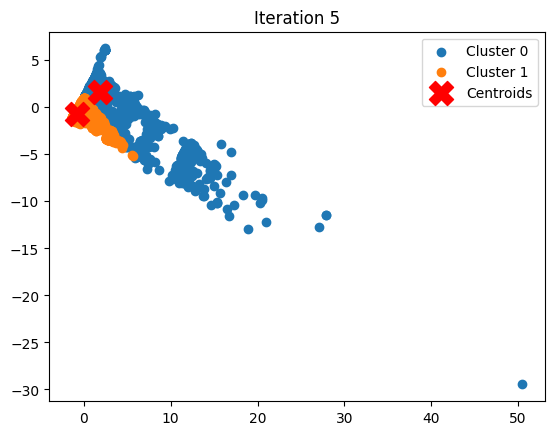

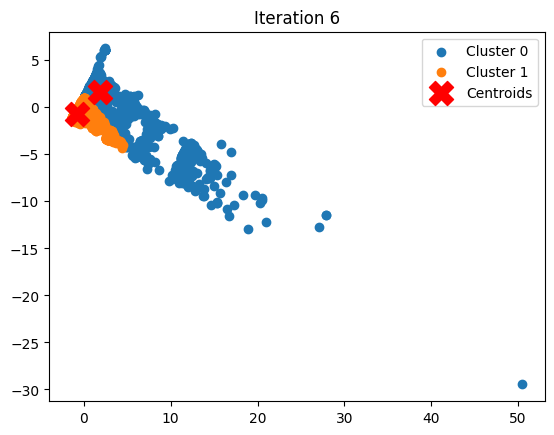

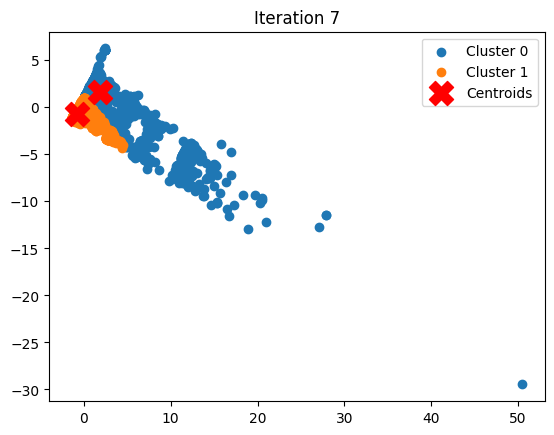

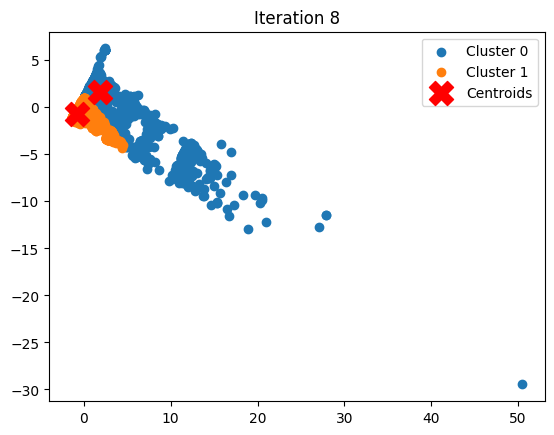

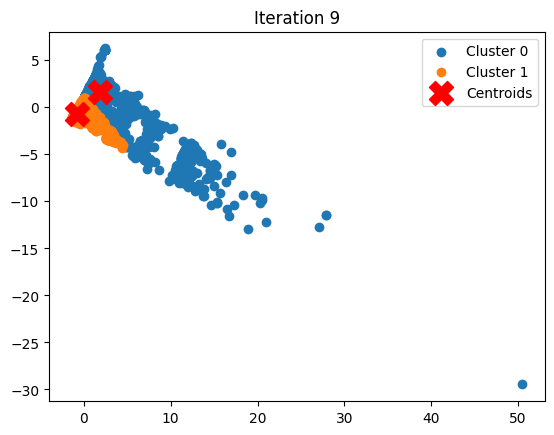

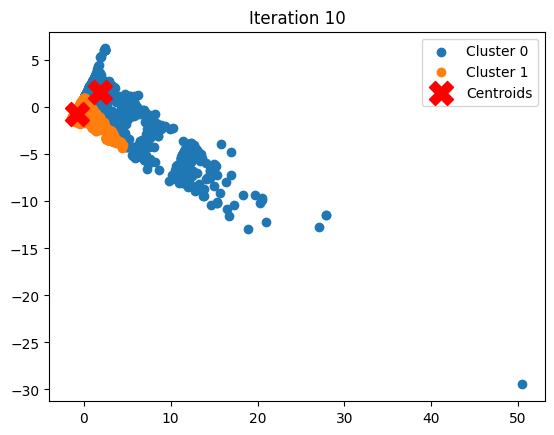

In [24]:
clusters, centroids = myKmeans(data[:, :2], num_clusters=2) # K-means clustering with 2 clusters

Sklearn có một hàm tích hợp sẵn là kmeans, thực hiện phân cụm K-means 
trên một tập dữ liệu quan sát đã cho. 

Kiểm tra xem hàm này nhận những 
tham số nào làm đầu vào và áp dụng nó để phân chia dữ liệu Delay 
Prediction thành K = 2 cụm. 

Liệu các trung tâm cụm có phù hợp với cách 
triển khai của bạn không?

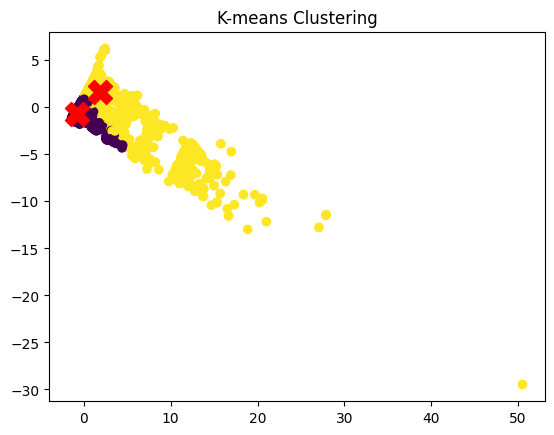

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(data[:, :2])

clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, marker='X')
plt.title('K-means Clustering')
plt.show()

- Phương thức khởi tạo K-means chứa các thông số đầu vào mặc định như sau: 

    **KMeans**(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

    - **n_clusters {int}:** Số lượng cụm cần tìm.

    - **init {'k-means++', 'random'}:** Phương pháp khởi tạo tâm cụm.

        - 'k-means++': Phương pháp khởi tạo thông minh để đẩy nhanh quá trình hội tụ.
        - 'random': Chọn ngẫu nhiên các tâm cụm từ các mẫu huấn luyện.

    - **n_init {'auto' or int}:** Số lần chạy thuật toán k-means với các khởi tạo khác nhau. Kết quả trả về là kết quả tốt nhất về tổng khoảng cách.

        - Với n_init='auto', nếu init='k-means++', n_init sẽ được đặt thành 10. Ngược lại, nó được đặt thành 1.

    - **max_iter {int}:** Số lần lặp tối đa của thuật toán k-means cho mỗi lần khởi tạo.

    - **tol {float}:** Ngưỡng dung sai để quyết định hội tụ.

    - **verbose {int}:** Mức độ chi tiết của quá trình thuật toán.

    - **random_state {int}:** Điều khiển hạt giống ngẫu nhiên cho việc khởi tạo tâm cụm. Dùng để tái tạo kết quả.

    - **copy_x {bool}:** Nếu True, dữ liệu sẽ được sao chép. Nếu False, dữ liệu có thể bị thay đổi trong quá trình tính toán.

    - **algorithm {'lloyd', 'elkan', 'auto', 'full'}:** Thuật toán để sử dụng

        - 'lloyd': Thuật toán Lloyd (tiêu chuẩn).
        - 'elkan': Thuật toán Elkan, nhanh hơn với các cụm nhỏ.

- Trung tâm cụm của cả 2 hàm myKmeans và sklearn.cluster.KMeans cho ra kết quả như nhau, điều này cho thấy trung tâm cụm phù hợp với cách triển khai. 

Chọn số lượng cụm phù hợp (sử dụng Elbow hoặc phương pháp khác). 

- **Phương pháp Elbow:**
    Phương pháp Elbow liên quan đến việc vẽ biểu đồ tổng quát của tổng bình phương khoảng cách (inertia) và tìm điểm mà tại đó độ giảm của inertia bắt đầu chậm lại.

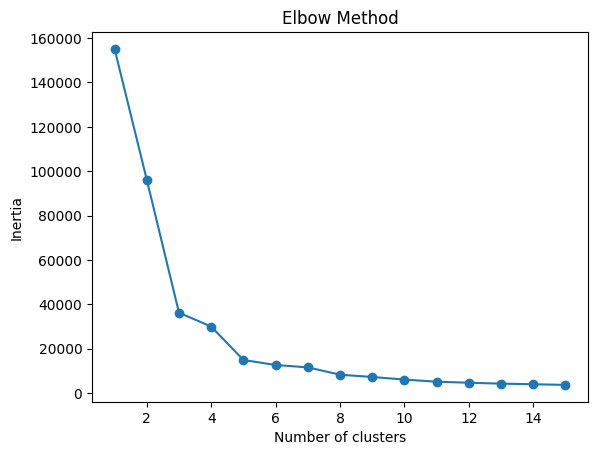

In [26]:
def plot_elbow_method(A, max_clusters=15):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(A)
        inertia.append(kmeans.inertia_)
    plt.figure()
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

plot_elbow_method(data[:, :2])

- Tại n_clusters=5, chỉ số inertia không thay đổi quá nhiều nữa, đây là điểm elbow. 

Áp dụng K-means và phân tích đặc điểm của từng cụm. 

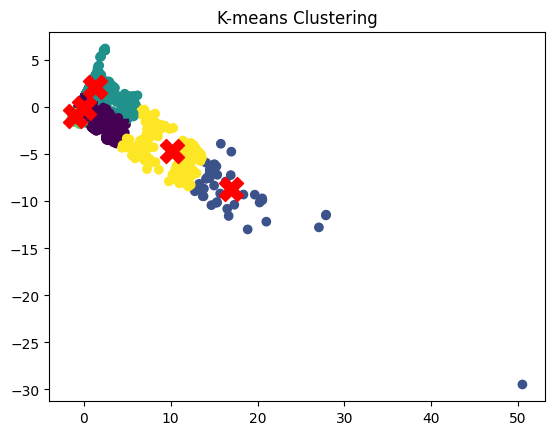

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data[:, :2])

clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, marker='X')
plt.title('K-means Clustering')
plt.show()

- **Phân tích:**

    - 3 cụm đầu tiên có trung tâm rất sát nhau, điều này là do vị trí trên có số lượng điểm dữ liệu rất lớn, dẫn đến mô hình bị bias nặng ở phía trên. 

    - Cụm màu vàng được phân bố khá rõ, tuy nhiên nó có thể được phân thành 2 cụm bởi vì ở phía trung tâm có một khoảng trống khá lớn. 

    - Cụm cuối cùng màu xanh bên dưới có một điểm outlier cách rất xa những điểm còn lại, điều này làm giảm nghiêm trọng khả năng phân cụm của mô hình K-means. 

Tính toán chỉ số Silhouette, Hopkins và phân tích kết quả. 

In [28]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data[:, :2], clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5726386401326113


In [29]:
from sklearn.neighbors import NearestNeighbors

def hopkins_statistic(X, m):
    knn = NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X = np.random.rand(*X.shape)
    rand_knn = NearestNeighbors(n_neighbors=1).fit(rand_X)
    
    u_dists, _ = knn.kneighbors(rand_X, n_neighbors=1)
    w_dists, _ = rand_knn.kneighbors(rand_X, n_neighbors=2)
    
    u = u_dists.sum()
    w = w_dists[:, 1].sum()
    
    return u / (u + w)

print(f'Hopkins Score:{hopkins_statistic(data[:, :2], data.shape[0]*0.1)}')


Hopkins Score:0.9221045828373741


**Phân tích:**

- Chỉ số Hopkins (Hopkins statistic) là một thước đo thống kê dùng để xác định liệu một tập dữ liệu có khuynh hướng phân cụm hay không. Nó giúp đánh giá tính chất của dữ liệu, đặc biệt là kiểm tra xem dữ liệu có cấu trúc cụm hay chỉ là ngẫu nhiên.

    - Gần 0: Dữ liệu có xu hướng tạo cụm.
    - Gần 0.5: Dữ liệu có xu hướng ngẫu nhiên.
    - Gần 1: Dữ liệu phân bố đều. 


- Chỉ số Silhouette (Silhouette coefficient) là một thước đo được sử dụng để đánh giá chất lượng của việc phân cụm dữ liệu. Nó đo lường mức độ tương đồng của một điểm dữ liệu với cụm của nó so với các cụm khác. Chỉ số này có giá trị nằm trong khoảng từ -1 đến 1, trong đó:

    - Giá trị gần 1 cho biết điểm dữ liệu đó được gán đúng vào cụm (tức là, nó nằm rất gần các điểm khác trong cụm của nó và xa các cụm khác).
    - Giá trị gần 0 cho biết điểm dữ liệu đó nằm ở ranh giới giữa hai cụm.
    - Giá trị gần -1 cho biết điểm dữ liệu đó có thể đã được gán sai cụm (tức là, nó gần hơn với các điểm trong cụm khác so với cụm hiện tại của nó).

- Chỉ số Hopkins của bộ dữ liệu là 0.92 là một con số rất cao, cho thấy dữ liệu có xu hướng tập trung thay vì phân tán.

- Chỉ số Silhouette được tính toán là 0.57, một số nằm giữa 0 và 1 cho thấy các điểm dữ liệu khi được phân cụm được gán gần đúng vào cụm ở mức độ tương đối, tuy vậy do không có sự tách bạch rõ ràng giữa các cụm của bộ dữ liệu nên chỉ số này không quá cao. 

- Chỉ số Hopkins cao trong khi chỉ số Silhouette ở mức trung bình cho thấy tuy rằng dữ liệu có xu hướng tập trung thành cụm nhưng mô hình vẫn gặp khó khăn khi phân cụm. Điều này có thể là do những cụm trong bộ dữ liệu quá sát nhau và phân bố không thể hiện sự khác biệt rõ ràng giữa các cụm gây khó khăn cho việc phân cụm của K-means. 

### 3. Biểu diễn kết quả
Trực quan hoá các cụm và giải thích ý nghĩa

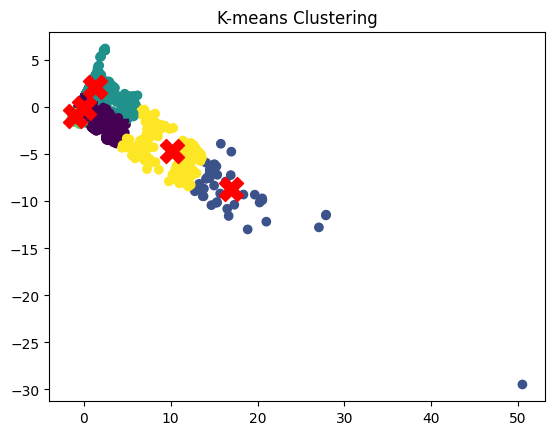

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data[:, :2])

clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, marker='X')
plt.title('K-means Clustering')
plt.show()

**Giải thích:**

- Các điểm được đánh dấu X tượng trưng cho các centroids được mô hình tìm thấy. 

- Những điểm dữ liệu thuộc các labels khác nhau (thuộc các cụm khác nhau) sẽ được biểu diễn khác màu

- Do đặc điểm của bộ dữ liệu có phân bố tập trung nhưng không thể hiện thành các cụm rõ ràng do đó các cụm được phân tích ra khá gần nhau ở 3 tâm cụm đầu tiên, 2 tâm cụm còn lại thì có vị trí khá tốt. Có một điểm Outlier cách rất xa những điểm còn lại, điều này có thể gây ảnh hướng tới sự phân cụm của mô hình. 

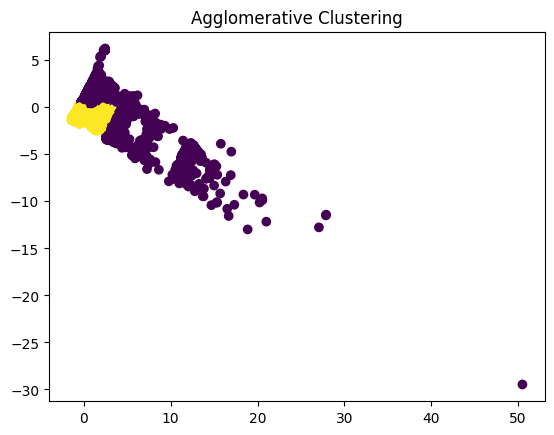

Silhouette Score: 0.6278056202335979


In [31]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering()

clusters = agg_clustering.fit_predict(data[:, :2])

plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

silhouette_avg = silhouette_score(data[:, :2], clusters)
print(f'Silhouette Score: {silhouette_avg}')

**Câu hỏi yêu cầu:** 

- Giải thích sự cần thiết của việc biến đổi, chuẩn hóa dữ liệu trước khi thực hiện Phân cụm. 

    Có 2 nguyên nhân chính dẫn đến việc người ta thường biến đối và chuẩn hóa dữ liệu trước khi Phân cụm: 

    - **Độ lớn khác nhau:** Các đặc trưng có độ lớn khác nhau có thể ảnh hưởng lớn đến khoảng cách tính toán trong phân cụm, làm cho các đặc trưng có giá trị lớn chi phối kết quả phân cụm.
    - **Tốc độ hội tụ:** Dữ liệu không chuẩn hóa có thể dẫn đến quá trình hội tụ chậm hoặc không ổn định trong thuật toán K-means.
    - Lấy ví dụ về bộ dữ liệu thực hành, nó có nhiều chiều và biên độ của các dữ liệu số cũng khác nhau, và một số biến là rời rạc trong khi những biến khác là liên tục, nếu đưa trực tiếp vào mô hình sẽ gây ra sự khó khăn cho việc phân cụm. Do đó nên tiến hành thực hiện Scale và PCA trước khi đưa vào mô hình K-means. 

- So sánh và đối chiếu giữa kết quả của K-means và Hierarchical clustering. 

    Đối chiếu kết quả của K-means và Hierarchical Clustering dựa trên thông số Silhouette như sau: 

    - **K-means:** 0.57
    - **Hierarchical:** 0.63
    - Xét về chỉ số đánh giá thì Hierarchical cho kết quả với chỉ số Silhouette cao hơn. Tuy nhiên về mặt thời gian, mô hình Hierarchical phải tốn rất nhiều thời gian để huấn luyện bởi vì nó không phù hợp khi áp dụng với bộ dữ liệu có số mẫu lớn điều này đúng với đặc điểm của 2 thuật toán đã được nêu bên trên. 

- Thảo luận về cách lựa chọn số lượng cụm và ảnh hưởng của nó đến kết quả. 

    Thông thường có 2 cách chọn số lượng cụm phổ biến: 

    - **Phương pháp Elbow (Elbow Method):** Phương pháp Elbow liên quan đến việc vẽ biểu đồ tổng bình phương khoảng cách (inertia) cho các giá trị khác nhau của số lượng cụm k. Inertia là tổng các bình phương khoảng cách từ mỗi điểm dữ liệu đến tâm cụm gần nhất. Chọn số lượng cụm tại "điểm khuỷu tay" của biểu đồ, nơi mà việc giảm inertia bắt đầu chậm lại.

    - Về độ ảnh hưởng: 

        - Kết quả tốt: Nếu điểm "khuỷu tay" trên biểu đồ inertia rõ ràng, phương pháp này có thể giúp chọn số lượng cụm tối ưu, tạo ra các cụm có độ gắn kết nội bộ cao và tách biệt rõ ràng.
        - Kết quả kém: Nếu điểm "khuỷu tay" không rõ ràng, việc chọn số cụm có thể trở nên chủ quan và có thể dẫn đến số lượng cụm không tối ưu, làm giảm chất lượng phân cụm.

    - **Chỉ số Silhouette (Silhouette Score):** Chỉ số Silhouette đo lường mức độ gắn kết của điểm dữ liệu với cụm của nó so với các cụm khác. Giá trị Silhouette trung bình cao hơn chỉ ra sự phân cụm tốt hơn. Chọn số lượng cụm với giá trị Silhouette trung bình cao nhất.

    - Về độ ảnh hưởng: 

        - Kết quả tốt: Giá trị Silhouette cao cho thấy các cụm có độ gắn kết nội bộ tốt và tách biệt rõ ràng. Chọn số cụm với giá trị Silhouette trung bình cao nhất thường dẫn đến phân cụm chất lượng cao.
        - Kết quả kém: Trong trường hợp giá trị Silhouette không thay đổi nhiều giữa các số cụm khác nhau, việc chọn số cụm có thể không ảnh hưởng nhiều đến chất lượng tổng thể.

- So sánh K-means với một thuật toán phân cụm khác, như DBSCAN hoặc hierarchical clustering.

    Ta có thể so sánh về đặc điểm của K-means so với một phương pháp phân cụm khác là Hierarchical, theo bảng bên dưới: 

    |Đặc điểm	|K-means	|Hierarchical Clustering	|
    |:---:|:---:|:---:|
    |Số lượng cụm	|Cần chỉ định trước	|Không cần chỉ định trước	|
    |Độ phức tạp tính toán	|O(n * k * t)	|O(n^3)	|
    |Hình dạng cụm	|Cầu	|Bất kỳ	|
    |Nhạy cảm với nhiễu	|Cao	|Trung bình	|
    |Hiệu quả với dữ liệu lớn	|Cao	|Thấp	|

**Tài liệu tham khảo:**

https://ichi.pro/vi/phuong-phap-silhouette-tot-hon-phuong-phap-elbow-de-tim-cac-cum-toi-uu-61080390822033

https://mlcourse.ai/book/topic07/topic7_pca_clustering.html#introduction

https://scikit-learn.org/stable/modules/clustering.html

https://pca4ds.github.io/analysis-of-distances.html

https://machinelearningcoban.com/2017/01/01/kmeans/

https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html

https://nguyenvanhieu.vn/thuat-toan-phan-cum-k-means/

https://www.geeksforgeeks.org/k-means-clustering-introduction/

https://pyclustertend.readthedocs.io/en/latest/

https://www.youtube.com/watch?v=E2VAV9eUh1o

https://machinelearningcoban.com/2017/06/15/pca/

https://viblo.asia/p/ml-from-scratch-thuat-toan-giam-chieu-du-lieu-pca-7ymJXKMa4kq

https://phamdinhkhanh.github.io/deepai-book/ch_ml/index_PCA.html

https://phamdinhkhanh.github.io/deepai-book/ch_ml/index_HierarchicalClustering.

https://vncoder.vn/bai-hoc/unsupervised-learning-clustering-phan-2-405
